# Perturbation Theory

We deal here with the calculation of the second-order corrections to the normal and anomalous Green's functions in the MTI-SC heterostructure.
In all that follows, we assume that the Hamiltonian can be written as $H = H_0 + V$, where $H_0 = H_{SC} + H_{MTI}$ is the Hamiltonian for the uncoupled materials and $V$ is the tunneling term.
Using interacting picture, we can write a perturbative series and compute the effect of proximity pairing in the MTI due to the superconductor.

In [1]:
import numpy as np
from scipy.integrate import quad_vec

from GreenFunctions_MTI import GFexact
from GreenFunctions_SC import GFnormal, GFnormalMat, GFanomalous, GFanomalousMat

# Hamiltonian parameters
params=dict(C = -0.0068, D1 = 1.3, D2 = 19.6, A1 = 2.2, A2 = 4.1, M = 0.28, B1 = 10, B2 = 56.6)

## **Normal Green's Function**


Using interacting picture, the normal MTI Green's function
$$
	\mathcal{G}_{\sigma\lambda, \sigma'\lambda'}(zt,z't') =
	-i \left\langle
	\hat{T}_t \hat{\psi}_{\sigma \lambda}(zt) \hat{\psi}^\dagger_{\sigma' \lambda'}(z't')
	\right\rangle \,,
$$
can be written in perturbative series as
$$
\begin{split}
	\mathcal{G}_{\sigma\lambda, \sigma'\lambda'}(zt,z't') 
	=
	\sum_{n=0}^{+\infty} \frac{(-i)^{n+1}}{n!} \int_{-\infty}^{+\infty} dt_1 \, \dots \int_{-\infty}^{+\infty} dt_n \, 
	%
	\frac{
	\bra{\phi_0} \hat{T}_t
	\check{\psi}_{\sigma\lambda}(zt) 
	\check{V}(t_1) \dots \check{V}(t_n)	
	\check{\psi}^\dagger_{\sigma'\lambda'}(z't') 
    \ket{\phi_0}
	}
	{\bra{\phi_0} S(+\infty, -\infty) \ket{\phi_0}} \,.
\end{split}
$$
Since all the odd-order terms vanishes, the most important correction to the unperturbed Green's function is given by the *second order* one
$$
\begin{split}
	\mathcal{G}^{(2)}_{\sigma\lambda, \sigma'\lambda'}(zt,z't') 
	=&
	\frac{i}{2} \int dt_1 \, \int dt_2 \, 
	\left\langle
	\hat{T}_t \check{\psi}_{\sigma\lambda}(zt) \check{V}(t_1) \check{V}(t_2) \check{\psi}_{\sigma'\lambda'}^\dagger(z't')
	\right\rangle_0 = \\[5pt]
	%%%
	=&
	\sum_{ss't} \sum_{rr'l}
	\int dt_1 \, \int dt_2 \, \int dw \, dw' \, \int dv \, dv' \,
	\gamma_{st}^{s'}(w,w') \gamma_{rl}^{r' \, \dagger}(v',v) \times \\[5pt]
	%
	& \times
	\Bigl\{
	\mathcal{G}^{(0)}_{\sigma\lambda, st}(zt, w t_1)
	\mathcal{G}^{(0)}_{s',r'}(w' t_1, v' t_2)
	\mathcal{G}^{(0)}_{rl, \sigma'\lambda'}(v t_2, z't')
	- \\[5pt]
	%
	& -	
    \mathcal{G}^{(0)}_{\sigma\lambda, \sigma'\lambda'}(zt, z't')
	\mathcal{G}^{(0)}_{s' r'}(w' t_1, v' t_2)
	\mathcal{G}^{(0)}_{rl, st}(v t_2, w t_1)
	\Bigr\} \,,
\end{split}
$$
which we expressed in terms of the *unperturbed* Green's function $\mathcal{G}^{(0)}_{\sigma\lambda, \sigma'\lambda'}(zt,z't')$ in the MTI and the *unperturbed* Green's function $\mathcal{G}^{(0)}_{\sigma, \sigma'}(zt,z't')$ in the SC.
The corresponding Feynman diagrams are plotted in the picture below:

<p style="text-align:center;">
<img src="Correction_NormalGF.png" width=85% height=85% class="center" />
</p>

Since the first one is a disconnected diagram, we can neglect it and the second-order correction to the normal MTI Green's function is thus given by
$$
\begin{split}
	\mathcal{G}^{(2)}_{\sigma\lambda, \sigma'\lambda'}(zt,z't') 
	=
	\sum_{ss't} \sum_{rr'l}
	& \int dt_1 \, dt_2 \, \int dw \, dw' \, \int dv \, dv' \,
	\gamma_{st}^{s'}(w,w') \gamma_{rl}^{r' \, \dagger}(v',v) \times \\[5pt]
	%
	& \times
	\Bigl\{
	\mathcal{G}^{(0)}_{\sigma\lambda, st}(zt, w t_1)
	\mathcal{G}^{(0)}_{s',r'}(w' t_1, v' t_2)
	\mathcal{G}^{(0)}_{rl, \sigma'\lambda'}(v t_2, z't')
	\Bigr\} \,.
\end{split}
$$

Since the Hamiltonian does not depend explicitly on time $\mathcal{G}^{(0)}_{\sigma\lambda, \sigma'\lambda'}(zt, z't') \equiv \mathcal{G}^{(0)}_{\sigma\lambda, \sigma'\lambda'}(z,z'; t-t')$, and Fourier transforming from time to frequency space through
$$
\mathcal{G}^{(0)}_{\sigma\lambda, \sigma'\lambda'}(z,z'; t-t') = 
\int \frac{d\omega}{2\pi} e^{-i\omega(t-t')} 
\mathcal{G}^{(0)}_{\sigma\lambda, \sigma'\lambda'}(z,z'; \omega) \,,
$$
it is possible to reduce the time integrals to simple algebraic products 
$$
\begin{split}
	\mathcal{G}^{(2)}_{\sigma\lambda, \sigma'\lambda'}(z,z'; \omega)
	=
	\sum_{ss't} \sum_{rr'l}
	& \int dw \, dw' \, \int dv \, dv' \,
	\gamma_{st}^{s'}(w,w') \gamma_{rl}^{r' \, \dagger}(v',v) \times \\[5pt]
	%
	& \times
	\Bigl\{
	\mathcal{G}^{(0)}_{\sigma\lambda, st}(z, w; \omega)
	\mathcal{G}^{(0)}_{s',r'}(w',v'; \omega)
	\mathcal{G}^{(0)}_{rl, \sigma'\lambda'}(v, z'; \omega)
	\Bigr\} \,.
\end{split}
$$

In [2]:
# parameters
d = 100.; kx = 0.007; ky = 0.006; L = 0.005; lT = 0.05*d; 
# energies
mu = 0.1; Delta = 0.05; w = 0.025

# compute MTI normal Green's function
zMTI = np.linspace(0., d, 250); gfMTI = np.array([GFexact(d=d, z=z, Z=z, kx=kx, ky=ky, L=L, w=w) for z in zMTI])
# compute SC 
zSC = np.linspace(d, 200, 250); gSC = np.array([GFnormal(z=z, Z=0., kx=kx, ky=ky, mu=mu, Delta=Delta, w=w) for z in zSC])

#### <font color='green'> **Green's Functions** </font> 

Below, we plot the tunneling amplitude as a function of the $z$ coordinate. 
The unperturbed Green's function in the MTI $\mathcal{G}^{(0)}_{\sigma\lambda, \sigma'\lambda'}(z,z';\omega)$ and in the superconductor $\mathcal{G}^{(0)}_{\sigma\sigma'}(z-z';\omega)$ are also shown.
In our model we assumed that the solution for the MTI Green's function is valid only for $0 \leq z,z' \leq d$ and vanishes elsewhere
$$
    \mathcal{G}^{(0)}_{\sigma\lambda, \sigma'\lambda'}(z,z';\omega) \neq 0 
    \qquad \text{for} \quad 0 \leq z,z' \leq d \,,
$$
and, similarly, the solution for the superconductor is valid only for $z-z' \geq d$
$$
    \mathcal{G}^{(0)}_{\sigma\sigma'}(z-z';\omega) \neq 0 
    \qquad \text{for} \quad z-z' \geq d \,.
$$

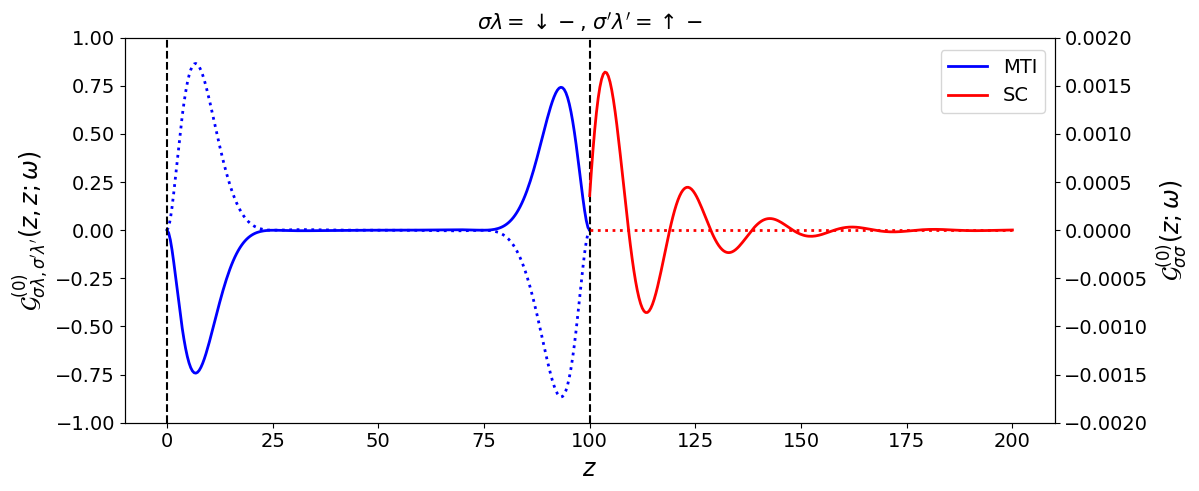

In [3]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

# MTI Green's function component
i = 3; j = 2
# labels for curves
icomp = ["$\\uparrow +$", "$\downarrow +$", "$\\uparrow -$", "$\downarrow -$"]
jcomp = ["$\\uparrow +$", "$\downarrow +$", "$\\uparrow -$", "$\downarrow -$"]

# figure
fig, axMTI = plt.subplots(figsize=(12, 5)); axSC = axMTI.twinx()

# plot line at the interface
axSC.axvline(x=d, c='black', ls='dashed'); axSC.axvline(x=0, c='black', ls='dashed')
# plot SC normal Green's function
axSC.plot(zSC, gSC.imag, ':', lw=2, color='red'); axSC.plot(zSC, gSC.real, lw=2, color='red', label='SC')
# plot MTI normal Green's function
axMTI.plot(zMTI, gfMTI[:,i,j].imag, ':', lw=2, color='blue'); axMTI.plot(zMTI, gfMTI[:,i,j].real, lw=2, color='blue', label='MTI')

# SC axis 
axSC.set_ylim(-0.002,0.002)
axSC.set_ylabel("$\mathcal{G}^{(0)}_{\sigma\sigma}(z;\omega)$", fontsize = 17)
axSC.tick_params(axis='both', which='major', labelsize=14)
# MTI axis 
axMTI.set_ylim(-1.,1.)
axMTI.set_xlabel("$z$", fontsize = 17)
axMTI.set_ylabel("$\mathcal{G}^{(0)}_{\sigma\lambda, \sigma'\lambda'}(z,z;\omega)$", fontsize = 17)
axMTI.tick_params(axis='both', which='major', labelsize=14)

title = '$\sigma\lambda = $' + icomp[i] + ', $\sigma\' \lambda\' = $' + jcomp[j]
axMTI.set_title(title, fontsize=15)
fig.legend(fontsize = 14, bbox_to_anchor=(0.9, 0.875));

## Tunneling

In order to evaluate the second order corrections to the Green's functions in the MTI, we need to make some specific assumption on the tunneling term.
In the following, we assume that the coupling function $\gamma_{\sigma \lambda}^{\sigma'}(z,z')$ for the tunneling from SC to MTI is given by
$$
    \gamma_{\sigma \lambda}^{\sigma'}(z,z') = \gamma_{\sigma \lambda}^{\sigma'} \,
    \delta(z+z'-2d) \exp  \Biggl\lbrack -\frac{(z-d)^2}{2 \lambda_{tun}^2} \Biggr\rbrack  \,,
$$
where the Dirac delta imposes that electrons tunneling from a material to the other mantain the same distance from the interface $z=d$.
Moreover, we assume that the tunneling amplitude decreases away from the interface following a Gaussian distribution with a tunneling length $\lambda_{tun}$.
The coupling function $\gamma_{\sigma \lambda}^{\sigma' \, \dagger}(z',z)$ for the opposite tunneling from MTI to SC can be written in a similar way as
$$
\begin{split}
    \gamma_{\sigma \lambda}^{\sigma' \, \dagger}(z',z) &= 
    \gamma_{\sigma \lambda}^{\sigma' \, \dagger} \,
    \delta(z'+z-2d) \exp  \Biggl\lbrack -\frac{(z'-d)^2}{2 \lambda_{tun}^2} \Biggr\rbrack  = \\[5pt]
    %
    &=
    \gamma_{\sigma \lambda}^{\sigma' \, \dagger} \,
    \delta(z'+z-2d) \exp  \Biggl\lbrack -\frac{(2d-z-d)^2}{2 \lambda_{tun}^2} \Biggr\rbrack = \\[5pt]
    %
    &=
    \gamma_{\sigma \lambda}^{\sigma' \, \dagger} \,
    \delta(z'+z-2d) \exp  \Biggl\lbrack -\frac{(z-d)^2}{2 \lambda_{tun}^2} \Biggr\rbrack = \\[5pt]
    %
    &=
    \gamma_{\sigma \lambda}^{\sigma' \, \dagger} \,
    \delta(z+z'-2d) f(z) \,,
\end{split}
$$
where the Dirac delta imposes $z'=2d-z$.
Here and in the whole derivation, we used a notation where the primed indices refer to electrons in the superconductor.

In [4]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

# function for tunneling amplitude 
def spatial_tunneling(z, d, lT):

    return np.exp( -(z-d)**2/(2*lT**2) )

Plugging these expressions for the tunneling coupling into the previous equation for the second-order correction of the MTI normal Green's function we obtain
$$
\begin{split}
	\mathcal{G}^{(2)}_{\sigma\lambda, \sigma'\lambda'}(z,z'; \omega)
	=
	\sum_{ss't} \sum_{rr'l}
	& \int dw \, dw' \, \int dv \, dv' \,
	\delta(w+w'-2d) \,  \delta(v+v'-2d) \,  f(w) f(v) \,
    \gamma_{st}^{s'} \gamma_{rl}^{r' \, \dagger} \, \times \\[5pt]
	%
	& \times
	\Bigl\{
	\mathcal{G}^{(0)}_{\sigma\lambda, st}(z, w; \omega)
	\mathcal{G}^{(0)}_{s',r'}(w',v'; \omega)
	\mathcal{G}^{(0)}_{rl, \sigma'\lambda'}(v, z'; \omega)
	\Bigr\} = \\[5pt]
    %%%
    \sum_{ss't} \sum_{rr'l}
	& \int dw \, dv \,  f(w) f(v) \,
    \gamma_{st}^{s'} \gamma_{rl}^{r' \, \dagger} \,
	\mathcal{G}^{(0)}_{\sigma\lambda, st}(z, w; \omega)
	\mathcal{G}^{(0)}_{s',r'}(v-w; \omega)
	\mathcal{G}^{(0)}_{rl, \sigma'\lambda'}(v, z'; \omega) \,,
\end{split}
$$
where in the last line we observed that the SC unperturbed Green's function is translational invariant
$$
    \mathcal{G}^{(0)}_{s,r}(2d-w, 2d-v; \omega) = 
    \mathcal{G}^{(0)}_{s,r}(v-w; \omega) \,,
$$
and we denoted the Gaussian tunneling amplitude as 
$$
    f(z) \equiv \exp  \Biggl\lbrack -\frac{(z-d)^2}{2 \lambda_{tun}^2} \Biggr\rbrack \,.
$$
Grouping the coupling constants into the following matrices
$$
    \Gamma =
    \begin{pmatrix}
        \gamma_{\uparrow +}^{\uparrow} & \gamma_{\uparrow +}^{\downarrow} \\[5pt]
        %
        \gamma_{\downarrow +}^{\uparrow} & \gamma_{\downarrow +}^{\downarrow} \\[5pt]
        %        
        \gamma_{\uparrow -}^{\uparrow} & \gamma_{\uparrow -}^{\downarrow} \\[5pt]
        %
        \gamma_{\downarrow -}^{\uparrow} & \gamma_{\downarrow -}^{\downarrow} \\[5pt]
    \end{pmatrix} \,,
    \qquad
    \Gamma^\dagger = 
    \begin{pmatrix}
        \gamma_{\uparrow +}^{\uparrow \, \star} & \gamma_{\downarrow +}^{\uparrow \, \star} & \gamma_{\uparrow -}^{\uparrow \, \star} & \gamma_{\downarrow -}^{\uparrow \, \star} \\[5pt] 
        %
        \gamma_{\uparrow +}^{\downarrow \, \star} & \gamma_{\downarrow +}^{\downarrow \, \star} & \gamma_{\uparrow -}^{\downarrow \, \star} & \gamma_{\downarrow -}^{\downarrow \, \star} 
    \end{pmatrix} \,,
$$
and the different components of the Green's functions as
$$
    \mathcal{G}_{MTI} = 
    \begin{bmatrix}
        g_{\uparrow +, \uparrow +} & g_{\uparrow +, \downarrow +} & 
        g_{\uparrow +, \uparrow -} & g_{\uparrow +, \downarrow -} \\[5pt]
        %
        g_{\downarrow +, \uparrow +} & g_{\downarrow +, \downarrow +} & g_{\downarrow +, \uparrow -} & g_{\downarrow +, \downarrow -} \\[5pt]
        %
        g_{\uparrow -, \uparrow +} & g_{\uparrow -, \downarrow +} &
        g_{\uparrow -, \uparrow -}  & g_{\uparrow -, \downarrow -}  \\[5pt]
        %
        g_{\downarrow -, \uparrow +}  & g_{\downarrow -, \downarrow +} &
        g_{\downarrow -, \uparrow -} & g_{\downarrow -, \downarrow -}
    \end{bmatrix} \,,
    \qquad
    \mathcal{G}_{SC} = 
    \begin{bmatrix}
	g_{\uparrow\uparrow } & g_{\uparrow\downarrow} \\[5pt]
	%
	g_{\downarrow\uparrow} & g_{\downarrow\downarrow}
    \end{bmatrix} \,,
    \qquad
    \mathcal{F}_{SC}^{\dagger} = 
    \begin{bmatrix}
    f_{\uparrow\uparrow}^\dagger & f_{\uparrow\downarrow}^\dagger \\[5pt]
    %
    f_{\downarrow\uparrow}^\dagger & f_{\downarrow\downarrow}^\dagger
    \end{bmatrix} \,,   
$$
the second-order correction to the Green's function can be expressed in a more compact and simpler form as
$$    
    \mathcal{G}_{MTI}^{(2)}(z,z'; \omega)
    =
    \int dv \, dv' \;
    f(v) f(v') \,
    \mathcal{G}_{MTI}^{(0)}(z, v; \omega) \,
    \Gamma  \,
    \mathcal{G}_{SC}^{(0)}(v'-v; \omega) \,
    \Gamma^{\dagger}  \,
    \mathcal{G}_{MTI}^{(0)}(v', z'; \omega)
    \,.
$$

In [5]:
# parameters
d = 100.; kx = 0.; ky = 0.; L = 0.; lT = 0.05*d; gamma = 1.
# energies
mu = 0.1; Delta = 0.05; w = 0.025
# coupling matrices
Gamma = np.matrix([[gamma,0],[0,gamma],[gamma,0],[0,gamma]])

# Second order correction to the normal GF
def G_second_order(d, z, Z, kx, ky, L, mu, Delta, w, Gamma, lT, Nint=100, C = -0.0068, D1 = 1.3, D2 = 19.6, A1 = 2.2, A2 = 4.1, M = 0.28, B1 = 10, B2 = 56.6, t = 1., hbar = 1.):

    # function for tunneling amplitude
    ftun = lambda v1,v2 : spatial_tunneling(v1, d=d, lT=lT)*spatial_tunneling(v2, d=d, lT=lT)
    
    # function for G_MTI(z,v)
    GMTIz = lambda v : GFexact(d=d, z=z, Z=v, kx=kx, ky=ky, L=L, w=w, C=C, D1=D1, D2=D2, A1=A1, A2=A2, M=M, B1=B1, B2=B2, hbar=hbar)
    
    # function for G_MTI(v',z')
    GMTIZ = lambda v : GFexact(d=d, z=v, Z=Z, kx=kx, ky=ky, L=L, w=w, C=C, D1=D1, D2=D2, A1=A1, A2=A2, M=M, B1=B1, B2=B2, hbar=hbar)
    
    # function for G_SC
    GSC = lambda v1,v2 : GFnormalMat(z=-v1, Z=v2, kx=kx, ky=ky, mu=mu, Delta=Delta, w=w, t=t, hbar=hbar)

    # define integrand function 
    fintegrand = lambda v1, v2: (ftun(v1,v2) * GMTIz(v1) @ Gamma @ GSC(v1,v2) @ Gamma.H @ GMTIZ(v2))

    # compute double integral
    return quad_vec(lambda v1 : quad_vec(lambda v2: fintegrand(v1, v2), 0., d)[0], 0., d)[0]
    
#G_second_order(d=d, z=70, Z=35, kx=0., ky=0., L=0., mu=mu, Delta=Delta, w=w, Gamma=Gamma, lT=lT);

## **Anomalous Green's Function**

Using interacting picture, the anomalous MTI Green's function
$$
	\mathcal{F}^\dagger_{\sigma\lambda, \sigma'\lambda'}(zt,z't') =
	-i \left\langle
	\hat{T}_t \hat{\psi}^\dagger_{\sigma \lambda}(zt) \hat{\psi}^\dagger_{\sigma' \lambda'}(z't')
	\right\rangle \,,
$$
can be written in perturbative series as
$$
\begin{split}
	\mathcal{G}^\dagger_{\sigma\lambda, \sigma'\lambda'}(zt,z't') 
	=
	\sum_{n=0}^{+\infty} \frac{(-i)^{n+1}}{n!} \int_{-\infty}^{+\infty} dt_1 \, \dots \int_{-\infty}^{+\infty} dt_n \, 
	%
	\frac{
	\bra{\phi_0} \hat{T}_t
	\check{\psi}^\dagger_{\sigma\lambda}(zt) 
	\check{V}(t_1) \dots \check{V}(t_n)	
	\check{\psi}^\dagger_{\sigma'\lambda'}(z't') 
    \ket{\phi_0}
	}
	{\bra{\phi_0} S(+\infty, -\infty) \ket{\phi_0}} \,.
\end{split}
$$
Since all the odd-order terms vanishes, the most important correction to the unperturbed Green's function is given by the *second order* one
$$
\begin{split}
	\mathcal{F}^{\dagger \, (2)}_{\sigma\lambda, \sigma'\lambda'}(zt,z't') 
	=&
	\frac{i}{2} \int dt_1 \, \int dt_2 \,
		\left\langle
		\hat{T}_t {\psi}^\dagger_{\sigma\lambda}(zt) {V}(t_1) {V}(t_2) {\psi}^\dagger_{\sigma'\lambda'}(z't')
		\right\rangle_0 = \\[5pt]
		%%%
		= &
		\sum_{ss't} \sum_{rr'l} \int dt_1 \, dt_2
		\int dw \, dw' \, \int dv \, dv' \,
		\gamma_{st}^{s' \, \dagger}(w',w) \gamma_{rl}^{r' \, \dagger}(v',v) \times \\[5pt]
		& \times \, 
		\mathcal{G}^{(0)}_{rl, \sigma\lambda}(v t_2, zt)
        \mathcal{F}^{\dagger \, (0)}_{r', s'}(v' t_2, w' t_1)
		\mathcal{G}^{(0)}_{st, \sigma'\lambda'}(w t_1, z't') 
\end{split}
$$
which we expressed in terms of the *unperturbed* Green's function $\mathcal{G}^{(0)}_{\sigma\lambda, \sigma'\lambda'}(zt,z't')$ in the MTI and the *unperturbed* anomalous Green's function $\mathcal{F}^{\dagger \, (0)}_{\sigma, \sigma'}(zt,z't')$ in the SC.
The corresponding Feynman diagram is plotted in the picture below, where the blue arrow stands for the normal MTI propagator and the red double arrow represents the SC anomalous one.

<p style="text-align:center;">
<img src="Correction_AnomalousGF.png" width=85% height=85% class="center" />
</p>

Since the Hamiltonian does not depend explicitly on time $\mathcal{F}^{\dagger \, (0)}_{\sigma\lambda, \sigma'\lambda'}(zt, z't') \equiv \mathcal{F}^{\dagger \, (0)}_{\sigma\lambda, \sigma'\lambda'}(z,z'; t-t')$, and Fourier transforming from time to frequency space through
$$
\mathcal{F}^{\dagger \, (0)}_{\sigma\lambda, \sigma'\lambda'}(z,z'; t-t') = 
\int \frac{d\omega}{2\pi} e^{-i\omega(t-t')} 
\mathcal{F}^{\dagger \, (0)}_{\sigma\lambda, \sigma'\lambda'}(z,z'; \omega) \,,
$$
it is possible to reduce the time integrals to simple algebraic products 
$$
\begin{split}
	\mathcal{F}^{\dagger \, (2)}_{\sigma\lambda, \sigma'\lambda'}(z,z'; \omega) 
	= &
	\sum_{ss't} \sum_{rr'l} 
	\int dw \, dw' \, \int dv \, dv' \,
	\gamma_{st}^{s' \, \dagger}(w',w) \gamma_{rl}^{r' \, \dagger}(v',v) \times \\[5pt]
	& \times \, 
	\mathcal{G}^{(0)}_{rl, \sigma\lambda}(v,z; \omega)
    \mathcal{F}^{\dagger \, (0)}_{r', s'}(v',w'; \omega)
	\mathcal{G}^{(0)}_{st, \sigma'\lambda'}(w,z'; -\omega) \,.
\end{split}
$$

In [6]:
# parameters
d = 100.; kx = 0.007; ky = 0.006; L = 0.005; lT = 0.05*d; 
# energies
mu = 0.1; Delta = 0.05; w = 0.025

# compute MTI normal Green's function
zMTI = np.linspace(0., d, 250); gfMTI = np.array([GFexact(d=d, z=z, Z=z, kx=kx, ky=ky, L=L, w=w) for z in zMTI])
# compute SC 
zSC = np.linspace(d, 200, 250); fSC = np.array([GFanomalous(z=z, Z=0., kx=kx, ky=ky, mu=mu, Delta=Delta, w=w) for z in zSC])

#### <font color='green'> **Anomalous Green's Functions** </font> 

Below, we plot the tunneling amplitude as a function of the $z$ coordinate. 
The unperturbed Green's function in the MTI $\mathcal{F}^{\dagger \, (0)}_{\sigma\lambda, \sigma'\lambda'}(z,z';\omega)$ and in the superconductor $\mathcal{F}^{\dagger \, (0)}_{\sigma\sigma'}(z-z';\omega)$ are also shown.
In our model we assumed that the solution for the MTI Green's function is valid only for $0 \leq z,z' \leq d$ and vanishes elsewhere
$$
    \mathcal{F}^{\dagger \, (0)}_{\sigma\lambda, \sigma'\lambda'}(z,z';\omega) \neq 0 
    \qquad \text{for} \quad 0 \leq z,z' \leq d \,,
$$
and, similarly, the solution for the superconductor is valid only for $z-z' \geq d$
$$
    \mathcal{F}^{\dagger \, (0)}_{\sigma\sigma'}(z-z';\omega) \neq 0 
    \qquad \text{for} \quad z-z' \geq d \,.
$$

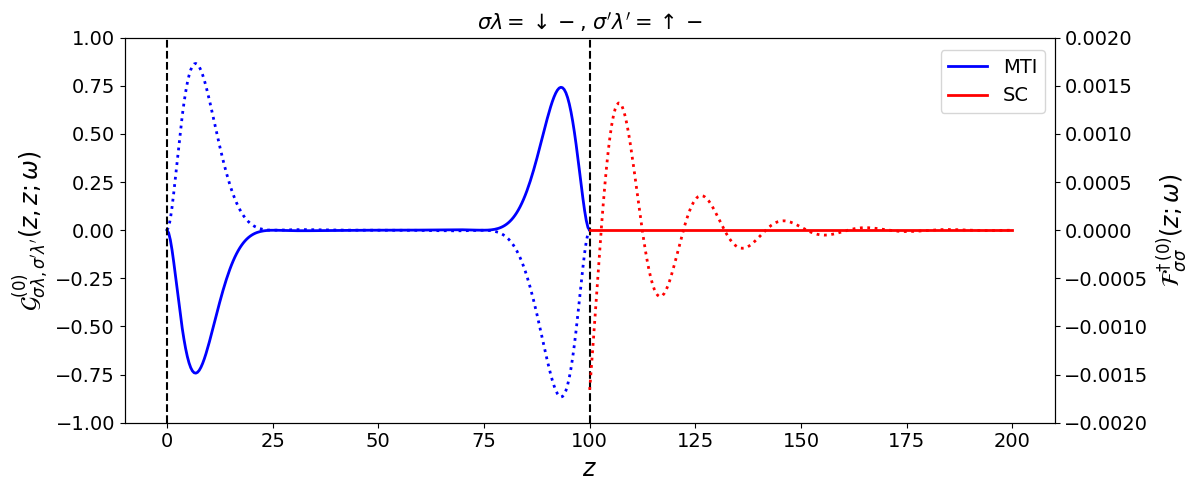

In [7]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

# MTI Green's function component
i = 3; j = 2
# labels for curves
icomp = ["$\\uparrow +$", "$\downarrow +$", "$\\uparrow -$", "$\downarrow -$"]
jcomp = ["$\\uparrow +$", "$\downarrow +$", "$\\uparrow -$", "$\downarrow -$"]

# figure
fig, axMTI = plt.subplots(figsize=(12, 5)); axSC = axMTI.twinx()

# plot line at the interface
axSC.axvline(x=d, c='black', ls='dashed'); axSC.axvline(x=0, c='black', ls='dashed')
# plot SC normal Green's function
axSC.plot(zSC, fSC.imag, ':', lw=2, color='red'); axSC.plot(zSC, fSC.real, lw=2, color='red', label='SC')
# plot MTI normal Green's function
axMTI.plot(zMTI, gfMTI[:,i,j].imag, ':', lw=2, color='blue'); axMTI.plot(zMTI, gfMTI[:,i,j].real, lw=2, color='blue', label='MTI')

# SC axis 
axSC.set_ylim(-0.002,0.002)
axSC.set_ylabel("$\mathcal{F}^{\dagger \, (0)}_{\sigma\sigma}(z;\omega)$", fontsize = 17)
axSC.tick_params(axis='both', which='major', labelsize=14)
# MTI axis 
axMTI.set_ylim(-1.,1.)
axMTI.set_xlabel("$z$", fontsize = 17)
axMTI.set_ylabel("$\mathcal{G}^{(0)}_{\sigma\lambda, \sigma'\lambda'}(z,z;\omega)$", fontsize = 17)
axMTI.tick_params(axis='both', which='major', labelsize=14)

title = '$\sigma\lambda = $' + icomp[i] + ', $\sigma\' \lambda\' = $' + jcomp[j]
axMTI.set_title(title, fontsize=15)
fig.legend(fontsize = 14, bbox_to_anchor=(0.9, 0.875));

Plugging the explicit expression for the tunneling term into the above equation we get
$$
\begin{split}
	\mathcal{F}^{\dagger \, (2)}_{\sigma\lambda, \sigma'\lambda'}(z,z'; \omega)
	=
    \sum_{ss't} \sum_{rr'l} 
    & \int dw \, dw' \, \int dv \, dv' \,
    \gamma_{st}^{s' \, \dagger} \, \gamma_{rl}^{r' \, \dagger} \,
	\delta(w+w'-2d) \,  \delta(v+v'-2d) \,  f(w) f(v) \, \times \\[5pt]
	& \times \, 
	\mathcal{G}^{(0)}_{rl, \sigma\lambda}(v,z; \omega)
    \mathcal{F}^{\dagger \, (0)}_{r', s'}(v',w'; \omega)
	\mathcal{G}^{(0)}_{st, \sigma'\lambda'}(w,z'; -\omega) = \\[5pt]
    %%%
    \sum_{ss't} \sum_{rr'l} 
    & \int dw \, dv \, 
    \gamma_{st}^{s' \, \dagger} \, \gamma_{rl}^{r' \, \dagger} \, f(w) f(v) \,
	\mathcal{G}^{(0)}_{rl, \sigma\lambda}(v,z; \omega)
    \mathcal{F}^{\dagger \, (0)}_{r', s'}(2d-v,2d-w; \omega)
	\mathcal{G}^{(0)}_{st, \sigma'\lambda'}(w,z'; -\omega) \,,
\end{split}
$$
and recalling that we assumed full translational invariance in the superconductor
$$
\mathcal{F}^{\dagger \, (0)}_{r', s'}(2d-v,2d-w; \omega) \equiv \mathcal{F}^{\dagger \, (0)}_{r', s'}(w-v; \omega) \,,
$$
we obtain
$$
	\mathcal{F}^{\dagger \, (2)}_{\sigma\lambda, \sigma'\lambda'}(z,z'; \omega)
	=
    \sum_{ss't} \sum_{rr'l} 
    \int dw \, dv \, 
    \gamma_{st}^{s' \, \dagger} \, \gamma_{rl}^{r' \, \dagger} \, f(w) f(v) \,
	\mathcal{G}^{(0)}_{rl, \sigma\lambda}(v,z; \omega)
    \mathcal{F}^{\dagger \, (0)}_{r', s'}(w-v; \omega)
	\mathcal{G}^{(0)}_{st, \sigma'\lambda'}(w,z'; -\omega) \,.
$$
Eventually, using the matrix notation introduced above, the second-order correction to the anomalous MTI Green's function can be written in a more compact form as
$$
    \mathcal{F}^{\dagger \, (2)}(z,z'; \omega)
    =
    \int dv \, dv' \;
    f(v) f(v') \,
    \mathcal{G}_{MTI}^{(0)}(v',z; \omega) \,
    \Gamma^{\dagger}  \,
    \mathcal{G}_{SC}^{(0)}(v-v'; \omega) \,
    \Gamma^{\dagger}  \,
    \mathcal{G}_{MTI}^{(0)}(v, z'; -\omega)
    \,.  
$$

In [9]:
# parameters
d = 100.; kx = 0.; ky = 0.; L = 0.; lT = 0.05*d; gamma = 1.
# energies
mu = 0.1; Delta = 0.05; w = 0.025
# coupling matrices
Gamma = np.matrix([[gamma,0],[0,gamma],[gamma,0],[0,gamma]])

# Second order correction to the normal GF
def F_second_order(d, z, Z, kx, ky, L, mu, Delta, w, Gamma, lT, Nint=100, C = -0.0068, D1 = 1.3, D2 = 19.6, A1 = 2.2, A2 = 4.1, M = 0.28, B1 = 10, B2 = 56.6, t = 1., hbar = 1.):

    # function for tunneling amplitude
    ftun = lambda v1,v2 : spatial_tunneling(v1, d=d, lT=lT)*spatial_tunneling(v2, d=d, lT=lT)
    
    # function for G_MTI(z,v)
    GMTIz = lambda v : GFexact(d=d, z=v, Z=z, kx=kx, ky=ky, L=L, w=w, C=C, D1=D1, D2=D2, A1=A1, A2=A2, M=M, B1=B1, B2=B2, hbar=hbar)
    
    # function for G_MTI(v',z')
    GMTIZ = lambda v : GFexact(d=d, z=v, Z=Z, kx=kx, ky=ky, L=L, w=-w, C=C, D1=D1, D2=D2, A1=A1, A2=A2, M=M, B1=B1, B2=B2, hbar=hbar)
    
    # function for G_SC
    FSC = lambda v1,v2 : GFanomalousMat(z=-v1, Z=v2, kx=kx, ky=ky, mu=mu, Delta=Delta, w=w, t=t, hbar=hbar)

    # define integrand function 
    fintegrand = lambda v1, v2: (ftun(v1,v2) * GMTIz(v1) @ Gamma @ FSC(v1,v2) @ Gamma.H @ GMTIZ(v2))

    # compute double integral
    return quad_vec(lambda v1 : quad_vec(lambda v2: fintegrand(v1, v2), 0., d)[0], 0., d)[0]
    
F_second_order(d=d, z=70, Z=35, kx=0., ky=0., L=0., mu=mu, Delta=Delta, w=w, Gamma=Gamma, lT=lT);

KeyboardInterrupt: 